## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merge_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_data[merge_data.duplicated(['Mouse ID','Timepoint'], keep = False)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = merge_data[merge_data.duplicated(subset=['Mouse ID'],keep = False)]
duplicate_mouse_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate = merge_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = False)
drop_duplicate 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
count_clean_data = drop_duplicate ["Mouse ID"].count()
count_clean_data

1883

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_groups = drop_duplicate.groupby('Drug Regimen')
regimen_groups



In [11]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
data_mean = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
data_median = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
data_variance = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
data_standard_deviation = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
data_SEM = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
Summary_df =pd.DataFrame({"Data Mean":data_mean,"Data Median":data_median, "Data Variance":data_variance,
                                           "Data Standard Deviation":data_standard_deviation,
                                          "Data SEM":data_SEM})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_df = Summary_df[["Data Mean","Data Median","Data Variance",
                                                       "Data Standard Deviation","Data SEM"]]
Summary_df 

,Data Mean,Data Median,Data Variance,Data Standard Deviation,Data SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary_df = drop_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
aggregate_summary_df

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.458254,50.854632,44.053659,6.637293
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_count= drop_duplicate["Drug Regimen"].value_counts()
measurements_count.columns = ['Drug Regimen','Number of Unique Mice Tested']
print(measurements_count)



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64


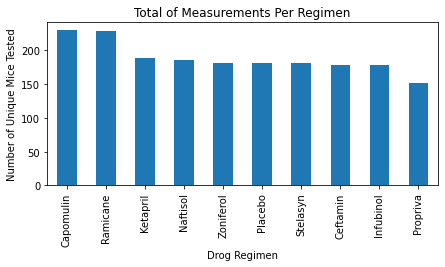

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_count = drop_duplicate["Drug Regimen"].value_counts()
measurements_count

# Use DataFrame.plot() in order to create a bar chart of the data
measurements_count.plot(kind="bar", figsize=(7,3))

# Set a title for the chart
plt.title("Total of Measurements Per Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drog Regimen")
plt.show()
plt.tight_layout()

NameError: name 'bar_plot' is not defined

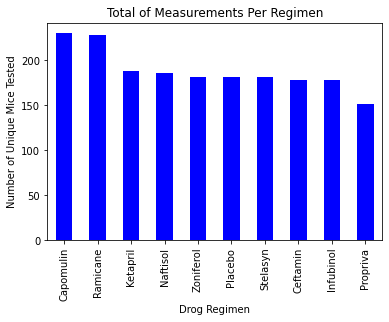

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_count.plot(kind="bar", facecolor="blue")
plt.title("Total of Measurements Per Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drog Regimen")
bar_plot

In [ ]:
drop_duplicate_ID = mouse_metadata.drop([107])


      Sex  Mouse ID  Drug Regimen  Age_months  Weight (g)
0  Female       123           123         123         123
1    Male       125           125         125         125


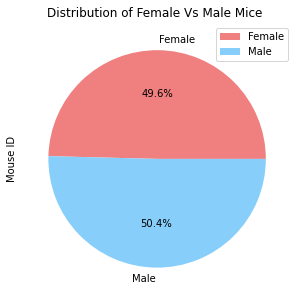

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drop_duplicate_ID = mouse_metadata.drop([107])
gender_count = pd.DataFrame(drop_duplicate_ID.groupby(["Sex"]).count()).reset_index()
print(gender_count)

plot = gender_count.plot.pie(y='Mouse ID', title=("Distribution of Female Vs Male Mice "),
                             labels=gender_count["Sex"],figsize=(5, 5),autopct="%1.1f%%", 
                             colors = ["lightcoral", "lightskyblue"])


      Sex  Mouse ID  Drug Regimen  Age_months  Weight (g)
0  Female       123           123         123         123
1    Male       125           125         125         125


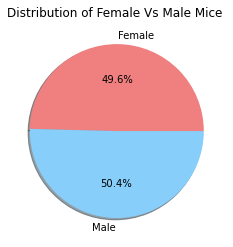

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = pd.DataFrame(drop_duplicate_ID.groupby(["Sex"]).count()).reset_index()
print(gender_count)

colors = ["lightcoral", "lightskyblue"]
explode = (0, 0)
plt.title("Distribution of Female Vs Male Mice ")

plt.pie(gender_count["Mouse ID"],explode=explode, labels=gender_count["Sex"], colors=colors,autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_regimens = drop_duplicate.loc[drop_duplicate["Drug Regimen"]== "Capomulin"]
Ramicane_regimens = drop_duplicate.loc[drop_duplicate["Drug Regimen"]== "Ramicane"]
Infubinol_regimens = drop_duplicate.loc[drop_duplicate["Drug Regimen"]== "Infubinol"]
Ceftamin_regimens = drop_duplicate.loc[drop_duplicate["Drug Regimen"]== "Ceftamin"]

sort_regimens = pd.concat([Capomulin_regimens, Ramicane_regimens, Infubinol_regimens, Ceftamin_regimens])
sort_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_Capomulin = Capomulin_regimens.groupby('Mouse ID').max()['Timepoint']
greatest_timepoint_Ramicane = Ramicane_regimens.groupby('Mouse ID').max()['Timepoint']
greatest_timepoint_Infubinol = Infubinol_regimens.groupby('Mouse ID').max()['Timepoint']
greatest_timepoint_Ceftamin = Ceftamin_regimens.groupby('Mouse ID').max()['Timepoint']

timepoint_Capomulin_df = pd.DataFrame(greatest_timepoint_Capomulin)
timepoint_Ramicane_df = pd.DataFrame(greatest_timepoint_Ramicane)
timepoint_Infubinol_df = pd.DataFrame(greatest_timepoint_Infubinol)
timepoint_Ceftamin_df = pd.DataFrame(greatest_timepoint_Ceftamin)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_Capomulin_df= pd.merge(timepoint_Capomulin_df, drop_duplicate, on=("Mouse ID", "Timepoint"), how="left")
merge_Ramicane_df= pd.merge(timepoint_Ramicane_df, drop_duplicate, on=("Mouse ID", "Timepoint"), how="left")
merge_Infubinol_df= pd.merge(timepoint_Infubinol_df, drop_duplicate, on=("Mouse ID", "Timepoint"), how="left")
merge_Ceftamin_df= pd.merge(timepoint_Ceftamin_df, drop_duplicate, on=("Mouse ID", "Timepoint"), how="left")


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data1 = merge_Capomulin_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles1 = tumor_vol_data1.quantile([.25,.5,.75])
lowerq1 = quartiles[0.25]
upperq1 = quartiles[0.75]
iqr1 = upperq-lowerq

lower_bound1 = lowerq - (1.5*iqr)
upper_bound1 = upperq + (1.5*iqr)

print(f"For Capomulin drug:")
print(f"Volumes below {lower_bound1} (mm3) could be outliers.")
print(f"volumes above {upper_bound1} (mm3) could be outliers.")

    

NameError: name 'quartiles' is not defined

In [21]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data2 = merge_Ramicane_df["Tumor Volume (mm3)"]
## print(tumor_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles2 = tumor_vol_data2.quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
iqr2 = upperq-lowerq

lower_bound2 = lowerq - (1.5*iqr)
upper_bound2 = upperq + (1.5*iqr)

print(f"For Ramicane drug:")
print(f"Values below {lower_bound2} (mm3) could be outliers.")
print(f"Values above {upper_bound2} (mm3) could be outliers.")

NameError: name 'quartiles' is not defined

In [22]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data3 = merge_Infubinol_df["Tumor Volume (mm3)"]
## print(tumor_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles3 = tumor_vol_data3.quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
iqr3 = upperq-lowerq

lower_bound3 = lowerq - (1.5*iqr)
upper_bound3 = upperq + (1.5*iqr)

print(f"For Infubinol drug:")
print(f"Values below {lower_bound3} (mm3) could be outliers.")
print(f"Values above {upper_bound3} (mm3) could be outliers.")

NameError: name 'quartiles' is not defined

In [23]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data4 = merge_Ceftamin_df["Tumor Volume (mm3)"]
## print(tumor_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles4 = tumor_vol_data4.quantile([.25,.5,.75])
lowerq4 = quartiles[0.25]
upperq4 = quartiles[0.75]
iqr4 = upperq-lowerq

lower_bound4 = lowerq - (1.5*iqr)
upper_bound4 = upperq + (1.5*iqr)

print(f"For Ceftamin drug:")
print(f"Values below {lower_bound4} (mm3) could be outliers.")
print(f"Values above {upper_bound4} (mm3) could be outliers.")

NameError: name 'quartiles' is not defined

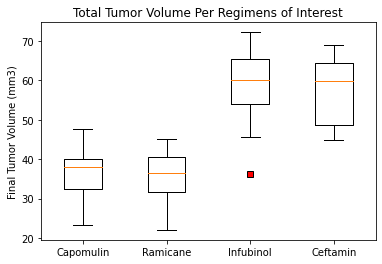

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data= [tumor_vol_data1, tumor_vol_data2, tumor_vol_data3, tumor_vol_data4]
fig1, ax1 = plt.subplots()
ax1.set_title('Total Tumor Volume Per Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(plot_data, flierprops=red_square, labels=["Capomulin", "Ramicane", "Infubinol","Ceftamin"])

plt.show()

In [25]:
Capomulin_regimens


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Line and Scatter Plots

In [26]:
# Mise that were treated with Capomulin
Capomulin_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
# Choose one mouse ID that was treated with Capomulin
Capomulin_mouse = Capomulin_regimens.loc[Capomulin_regimens["Mouse ID"]=="x401"]
Capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
avg_tumor_vol = 
Capomulin_plot = Capomulin_mouse.plot('Timepoint', 'Tumor Volume (mm3)',kind="line")
plt.title("Capomulin Treatment For Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

SyntaxError: invalid syntax (<ipython-input-28-90ea213b3a60>, line 2)

In [29]:
Capomulin_avg_vol= Capomulin_regimens.groupby(['Mouse ID']).mean()
Capomulin_avg_vol.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


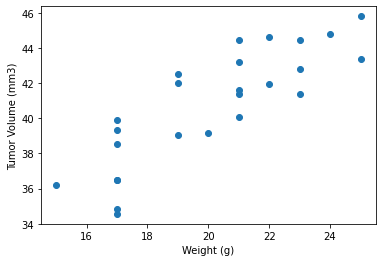

In [30]:
plt.scatter(Capomulin_avg_vol['Weight (g)'],Capomulin_avg_vol['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

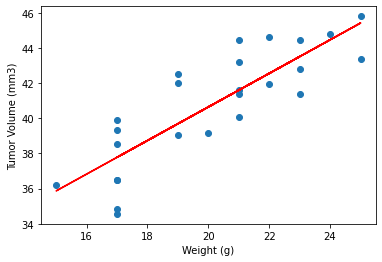

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_avg_vol['Weight (g)']
y_values = Capomulin_avg_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()